<a href="https://colab.research.google.com/github/Sungrebe/Smart-Bird-Feeder/blob/main/working_version_of_nabirds_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install astra and sentence-transformers (to load model)
!pip install astrapy
!pip install sentence-transformers

Saving 640-12.jpg to 640-12.jpg
Top 5 matches from database:
Species: Magnolia Warbler, Probability: 0.9734594
Species: Pine Warbler, Probability: 0.96924293
Species: Bay-breasted Warbler, Probability: 0.9681344
Species: Blackpoll Warbler, Probability: 0.9674716
Species: Black-throated Green Warbler, Probability: 0.9671495


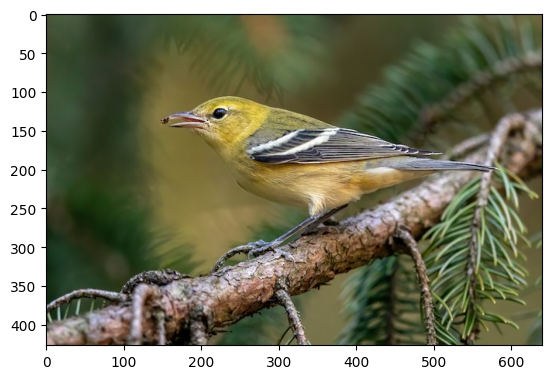

In [ ]:
from PIL import Image
from matplotlib import pyplot as plt
from astrapy.db import AstraDB
from sentence_transformers import SentenceTransformer
from google.colab import drive, userdata, files

model = SentenceTransformer('sentence-transformers/clip-ViT-B-16')

db = AstraDB(
    userdata.get("ASTRA_DB_APPLICATION_TOKEN"),
    userdata.get("ASTRA_DB_API_ENDPOINT")
)
col = db.collection("bird_images")

async def vector_search(collection_name, vector_embedding, limit=25):
  vector = col.vector_find(
    vector_embedding.tolist(),
    limit=limit,
    fields={"text","$vector"}
  )

  return vector

async def image_search(img):
  img_emb = model.encode(img)
  matches = await vector_search("bird_images", img_emb)
  return matches

images = files.upload()
img = Image.open(next(iter(images)))
sp_matches = await image_search(img)

plt.imshow(img)

print("Top 5 matches from database:")
for sp_match in sp_matches[0:5]:
  print(f"Species: {sp_match['text']}, Probability: {sp_match['$similarity']}")